## Examples of MonteCarlo integrations 
In this notebook I simulate some examples of monte-carlo integration. I will consider three examples:
\begin{enumerate}
\item Monte Carlo approximation of one dimensional integral
\item Monte-Carlo approximation for $\pi$
\item Metropolis-Hastings Algorithm
\item Sequential Monte-Carlo for a nonlinear process.
\end{enumerate}

In [88]:
import numpy as np
import scipy as sp
from latex_envs.latex_envs import figcaption
from scipy import integrate as int
import matplotlib.pyplot as plt

## Monte-Carlo approximation of $\int_0^1 e^x dx$
For integration of $f(x)$ from 0 to 1, we need to generate $N$ random numbers in the range $[0,1]$, and then evaluate using the following approximation,
\begin{equation}
\int_0^1 f(x) dx=\frac{1}{N}\sum_{i=1}^N f(x_i)
\end{equation}

In [99]:
#Monte carlo evaluation
numvalsarr=np.array([10,100,1000,10000,100000,1000000,10000000]); #same as N
expint_MC=np.zeros(shape=np.size(numvalsarr))
count=0
for numvals in numvalsarr:
    randomvals=np.random.rand(numvals)
    expint_MC[count]=np.mean(np.exp(randomvals))
    count+=1
#integration
def f(x):
    return np.exp(x)
intval=int.quad(f,0,1)

In [120]:
print("Integration value = {}".format(intval[0]))
print("MonteCarlo value = {}".format(expint_MC[-1]))
print("Error = {}".format(intval[0]-expint_MC[-1]))

Integration value = 1.7182818284590453
MonteCarlo value = 1.718519492260024
Error = -0.00023766380097867135


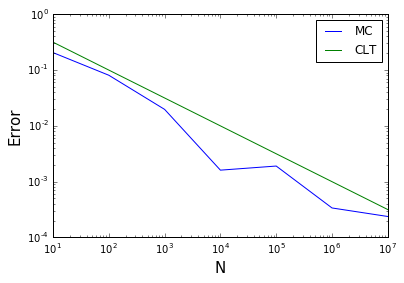

In [121]:
#check central limit thm :
plt.loglog(numvalsarr,np.abs(expint_MC-intval[0]),label='MC')
plt.loglog(numvalsarr,np.reciprocal(np.sqrt(numvalsarr)),label='CLT')
plt.xlabel('N',fontsize=15)
plt.ylabel('Error',fontsize=15)
plt.legend()
figcaption("Error scaling of monte-carlo integration with number of points. Comparison with preiction of CLT", label="fig:Errorscaling")

## Metropolis Hastings algorithm
Use this algorithm to sample from a given probability distribution. Example : We have the following target distribution,
\begin{equation}
P(x)=\exp(-x)\ \forall x>0
\end{equation}
We would like to generate a Markov chain, from a random distribution, assume it is normal distribution with mean $0$ and standard deviation $1$. Then we generate the points, and accept of regect the new point based on an acceptance metric.

References for the Algorithm :
\begin{enumerate}
\item Algorithm in R :https://stephens999.github.io/fiveMinuteStats/MH-examples1.html
\item Basics : https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm
\end{enumerate}

In [136]:
#define variables :
N=1000 #number of time steps for monte-carlo


In [160]:
#function definitions 
#target distribution. the MCMC generates samples from the target distribution.
def target(x):
    if x<0:
        return 0
    else:
        return np.exp(-x)
    
def MCMC(Nval,init,σ):
    x=np.zeros(Nval) # markov chain
    x[1]=init #arbitrary initial value
    for p in range(1,Nval):
        currentx=x[p-1]
        proposedx=np.random.normal(currentx,σ) #normal distributed with a std σ around currentx
        A=target(proposedx)/target(currentx)
        if np.random.rand(1)<A:
            x[p]=proposedx #accept move with probability min(1,A)
        else:
            x[p]=currentx #reject move
    return x
                
        

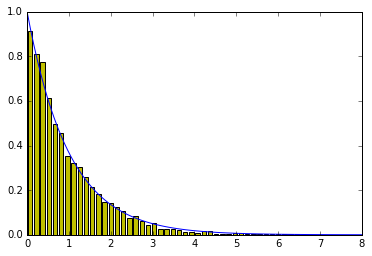

In [202]:
#Generates a markov chain which produces points with the target distribution.
z1=MCMC(10000,3,1)
counts, bins = np.histogram(z1, 50)
pdf=counts/(np.sum(counts)*np.abs(bins[1]-bins[2]))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, pdf, align='center', width=width,facecolor='y')
x1=np.linspace(0,np.ceil(np.max(z1)),100)
vtarget = np.vectorize(target)
plt.plot(x1,vtarget(x1),'-b')
figcaption("")

## Likelihood Estimation using Sequential Monte Carlo
The goal in this section is to do a toy problem of a sequential monte carlo algorithm in the classical setting. We have two variables $x$ and $y$. $y$ is the observation variable, and $x$ is the 'positions of the particles'. The SMC setup consists of two sets of transition equations : $p(x_t|x_{t-1})$ and $p(y|x_t)$. Let us do the example from [https://www.sas.upenn.edu/~jesusfv/ejemplo.pdf]
\begin{align}
x_t&=0.5+0.3\frac{x_{t-1}}{1+x^2_{t-1}}+w_t\\
y_t&=x_t+v_t
\end{align}
where $w_t\sim \mathcal{N}(0,1)$ and $v_t\sim t(2)$. Note that the first equation corresponds to the transition $p(x_t|x_{t-1})$, and it only depends on the previous step (Markov condition).